# 3 Виконання

## 3.1 Повторити дії описані в пункті «Часові ряди і проста лінійна регресія частина 2» даної лабораторної роботи та порівняти з результатом попередньої лабораторної роботи.

### Завантажимо дані з ave_hi_nyc_jan_1895-2018.csv у датафрейм. Переназвемо колонки та застосуємо цілочисельне ділення, поділивши значенння років на 100.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


*Завантаження датасету*

### Розіб'ємо дані на навчальні та тестові. Оскільки оцінювачі scikit-learn вимагають, щоб в якості навчальних і тестових даних використовувалися двовимірні масиви, то застосуємо метод reshape та передамо в нього значення -1, 1б щоб перетворити їх з одновимірного масиву з n елементами в двовимірний масив з n рядками і одним стовпцем.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1),
    nyc.Temperature.values,
    random_state=11)

*Розбиття даних для навчання і тестування*

### Для перевірки пропорції навчальних і тестових даних (75% до 25%) задамо розміри X_train і X_test.

In [5]:
x_train.shape, x_test.shape

((93, 1), (31, 1))

*Роміри навчальних і тестових даних (75% до 25%)*

### За допомогою оцінювача LinearRegression та простої лінійної регресії, що  окремим випадком множинної лінійної регресії, навчимо модель. 

In [8]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

LinearRegression()

*Тренування моделі*

### Виведемо кут нахилу, який зберігається в атрибуті coeff_ оцінювача.

In [9]:
linear_regression.coef_

array([0.01939167])

*Кут нахилу*

### Виведемо точку перетину, яка зберігається в атрибуті intercept_ оцінювача (m у формулі).

In [10]:
linear_regression.intercept_

-0.30779820252656265

*Точка перетину*

### Проведемо тестування моделі за даними з X_test і перевіримо прогнози по набору даних, виводячи прогнозовані і очікувані значення для кожного п'ятого елементу. 

In [11]:
predicted = linear_regression.predict(x_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected {e:.2f}')

predicted: 37.86, expected 31.70
predicted: 38.69, expected 34.80
predicted: 37.00, expected 39.40
predicted: 37.25, expected 45.70
predicted: 38.05, expected 32.30
predicted: 37.64, expected 33.80
predicted: 36.94, expected 39.70


*Тестування моделі*

### За допомогою кута нахилу і точки перетину зробимо прогнози для середньої температури в січні 2019 року, а також оцінки середньої температури в січні 1890 року.

In [12]:
m = linear_regression.coef_
b = linear_regression.intercept_
predict = lambda x: m * x + b

*Лямбда вираз формули y = mx + b*

### Спрогнозуємо значення за 2019 рік.

In [13]:
predict(2019)

array([38.84399018])

*Прогноз на 2019 рік*

### Спрогнозуємо значення за 1890 рік.

In [ ]:
predict(1890)

*Прогноз на 1890 рік*

### Візуалізуємо набір даних з регресійними прямими.

### Почнемо зі створення масиву, що містить мінімальні і максимальні значення дати з nyc.Date. Вони стануть координатами x початкової і кінцевої точок регресійної прямої.

In [17]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
x

array([1895, 2018])

*Масив даних*

### Передамо масив x функції predict та отримаємо пронозовані значення, які будуть використовуватися в якості координат y.

In [19]:
y = predict(x)
y

array([36.43942269, 38.82459851])

*Спрогнозовані значення*

 ### Побудуємо діаграму розкиду даних за допомогою функції scatterplot бібліотеки Seaborn і функції plot бібліотеки Matplotlib. Для виведення точок даних скористаємося методом scatterplot з колекцією DataFrame з ім'ям nyc. Змінимо масштаб осі. Зобразимо регресію.

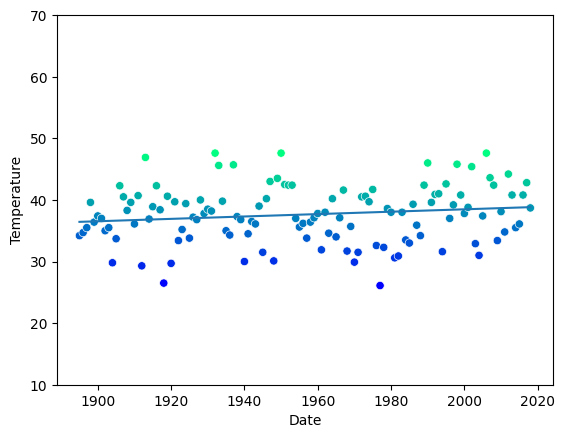

In [21]:
import seaborn as sns
axes = sns.scatterplot(data=nyc, x='Date',
                       y='Temperature', hue='Temperature',
                       palette='winter', legend=False)
axes.set_ylim(10, 70)
line = plt.plot(x, y)

*Візуалізація з допомогою LinearRegression*

### Поглянемо на візуалізацію з минулої лабораторної та переконаємося, що обидві ідентичні.

(10.0, 70.0)

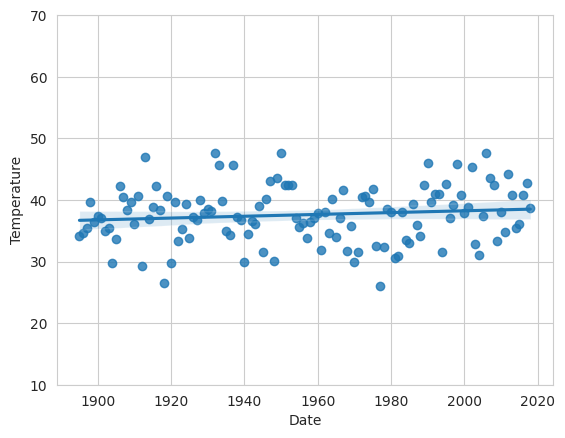

In [23]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

*Візуалізація минулої лабораторної*

### Як бачимо, візуалізації практично ідентичні.

## Аналогічно з прикладом з лекції 7 згенеруйте набір даних та класифікуйте його використавши класифікатор SVC (слайд 95)

### Для початку імпортуємо ListedColormap з matplotlib.colors та класифікатор SVC з sklearn.svm.

In [24]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

*Імпортування модулів*

### За допомогою бібліотеки NumPy згенеруємо набір даних, передавши початковий seed 1 та використавши функції np.random.randn( згенерує матрицю з 200-ми рядками та 2-ма стовпцями ), np.logical_xor( застосовує операцію виключного або ), np.where( приймає в себе логічну операцію xor та повертає значення 1, якщо True, -1, якщо False).

In [27]:
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

*Генерація даних*

### Зобразимо згенеровані дані. За допомогою функції scatter, спочатку синіми хрестиками зобразимо ті точки, для яких y_xor == 1. Потім ті точки, для яких y_xor == -1. Значення 0 та 1 у других індексах - це відповідно порядкові номери стовпчиків.

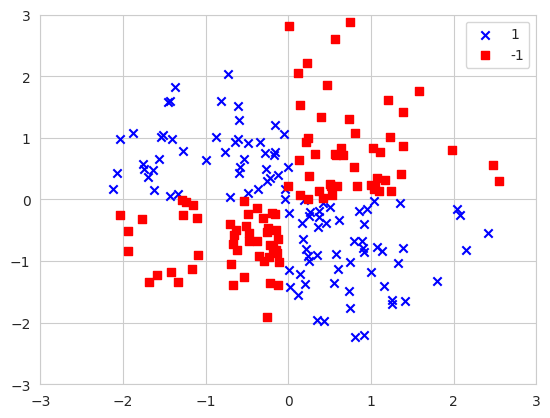

In [28]:
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1],
            c='b', marker='x', label='1')
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1],
            c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

*Візуалізація згенерованих даних*

### Запишемо функцію plot_decision_regions, яка приймає в параметри: X - двовимірний масив аргуметів, y - одновимірний масив значень, test_idx=None - тестовий індекс, resolution=0.02 - масштаб.

### Рефактиремо функцію, надану в лекції. "unq" - масив унікальних значень "y", а "unql" - довжина "unq".

### Викличемо IndexError, якщо передані масиви "markers" або "colors" менші за разміром ніж "unq".

### cmap - екземпляр класу ListedColormap, у який ми передали кольори до індекса "unql"; x1_min, x1_max - відповідно мінімальне і максимальне значення значення першого стовпчика, зміщені на 1 для кращої видимості; x2_min, x2_max - для другого стовпчика відповідно.

### xx1, xx2 - масиви рівномірно розподілених значень між мінімальним та максимальним з кроком в resolution за допомогою функції numpy.arange; xx1, xx2 - це перетворені попередні xx1 та xx2 за допомогою функції numpy.meshgrid, яка робить сітку індексів з одновимірних масивів; xx1_flat, xx2_flat - сплющені до одновимірних двовимірні масив xx1, xx2 за допомогою методу ravel; xx_t - матриця, стовпчиками якої є xx1_flat та xx2_flat.

### z - спрогнозовані класифікатором значення, у метод predict якого передаємо xx_t.

### За допомогою plt.contourf зображаємо контури класів, передаючи у функцію xx1, xx2 та кольорову мапу. За допомогою xlim та ylim, у які передаємо мінімальні та максимальні значення, обмежуємо візуалізацію для зручного сприйняття.

### У циклі для кожного класу вимальовуємо свої точки, передаючи у функцію scatter їхню позицію, колір, маркер, кольор контуру, позначку.

### Якщо тестовий індекс не пустий, то вимальовуємо точки з x_test.

In [63]:
def plot_decision_regions(x, y, classifier, markers, colors,
                          test_idx=None, resolution=0.02):
    unq = np.unique(y)
    unql = len(unq)
    if len(markers) < unql or len(colors) < unql:
        raise IndexError
    cmap = ListedColormap(colors[:unql])
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1 = np.arange(x1_min, x1_max, resolution)
    xx2 = np.arange(x2_min, x2_max, resolution)
    xx1, xx2 = np.meshgrid(xx1, xx2)
    xx1_flat, xx2_flat = xx1.ravel(), xx2.ravel()
    xx_t = np.array([xx1_flat, xx2_flat]).T
    z = classifier.predict(xx_t)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, c1 in enumerate(unq):
        params = dict(c=colors[idx], marker=markers[idx], label=c1,
                      edgecolor='black')
        plt.scatter(x=x[y == c1, 0], y=x[y == c1, 1], **params)
    if not test_idx:
        return
    params = dict(marker='o', edgecolor='black', s=100)
    x_test = x[test_idx, :]
    plt.scatter(x_test[:, 0], x_test[:, 1], **params)


*Функція plot_decision_regions*

/tmp/ipykernel_43616/1451472014.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == c1, 0], y=x[y == c1, 1], **params)


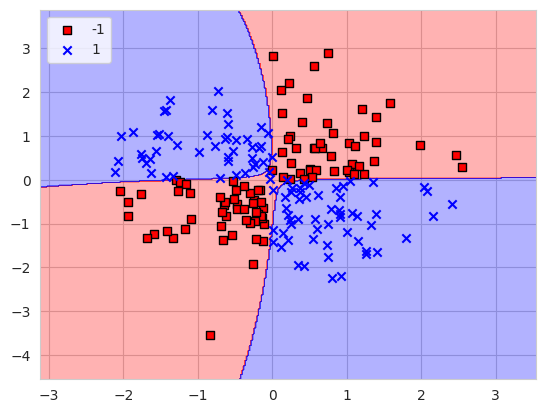

In [64]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, svm, markers, colors)
plt.legend(loc='upper left')
plt.show()